# import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.datasets import load_digits
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler

import os
import warnings
warnings.filterwarnings('ignore')

# introduce data

In [2]:
digit=load_digits()
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
# Create a DataFrame for the digits dataset
df_digits = pd.DataFrame(digit.data, columns=[f'pixel_{i}' for i in range(digit.data.shape[1])])
df_digits['target']=digit.target

# Display the DataFrame
print("DataFrame for Digits Dataset:")
df_digits.head()

DataFrame for Digits Dataset:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df_digits.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [5]:
# shape of dataset
df_digits.shape

(1797, 65)

In [6]:
# describe
df_digits.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
# check is null value
df_digits.isnull().sum()

pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
target      0
Length: 65, dtype: int64

No null value in the dataset

# EDA

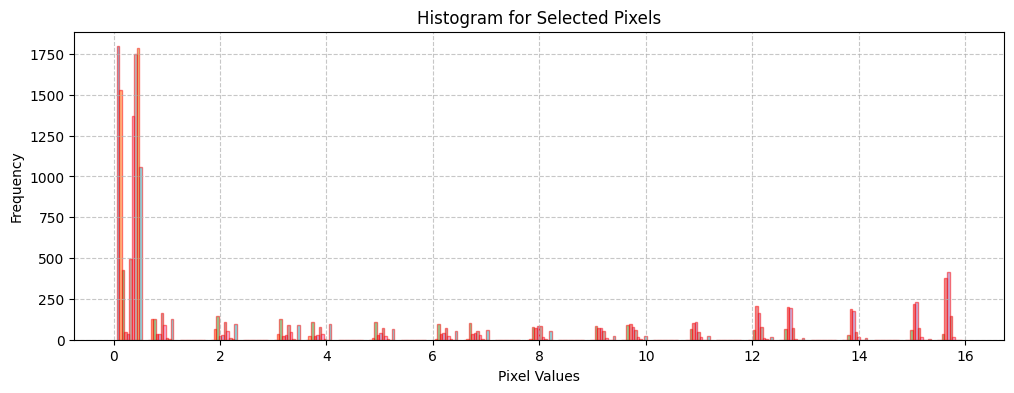

In [8]:
# Select the columns you want to include in the histogram
#columns_to_plot = ["pixel_0", "pixel_1", "pixel_2", "pixel_3", "pixel_4", "pixel_5", "pixel_6", "pixel_7", "pixel_8", "pixel_9", "pixel_10"]
columns_to_plot=df_digits.columns[0:10]
# Create subplots
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the histogram for each selected column
ax.hist(df_digits[columns_to_plot], bins='auto', alpha=0.5, edgecolor='red')

# Set labels and title
ax.set_xlabel('Pixel Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram for Selected Pixels')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


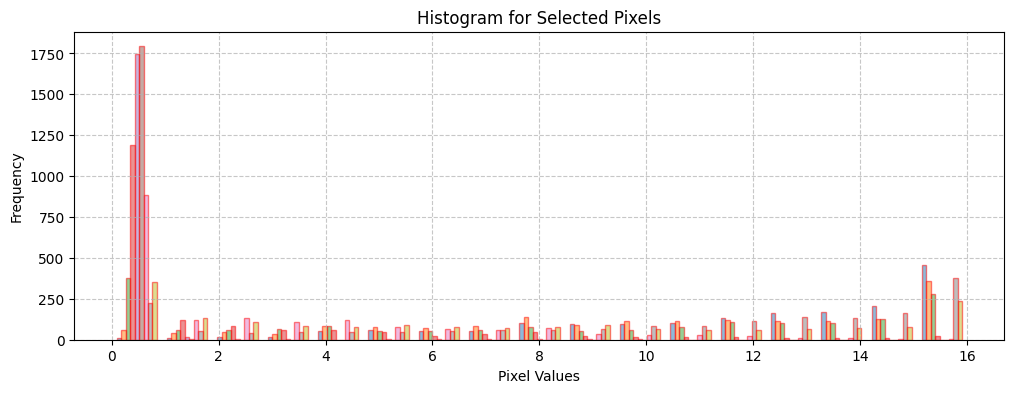

In [9]:
import matplotlib.pyplot as plt

# Select the columns you want to include in the histogram
#columns_to_plot = ["pixel_0", "pixel_1", "pixel_2", "pixel_3", "pixel_4", "pixel_5", "pixel_6", "pixel_7", "pixel_8", "pixel_9", "pixel_10"]
columns_to_plot=df_digits.columns[11:20]
# Create subplots
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the histogram for each selected column
ax.hist(df_digits[columns_to_plot], bins='auto', alpha=0.5, edgecolor='red')

# Set labels and title
ax.set_xlabel('Pixel Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram for Selected Pixels')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


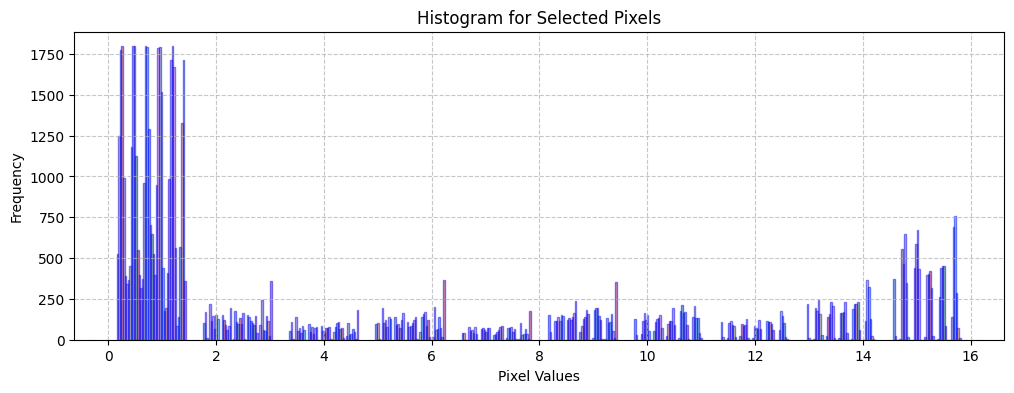

In [10]:
import matplotlib.pyplot as plt

# Select the columns you want to include in the histogram
#columns_to_plot = ["pixel_0", "pixel_1", "pixel_2", "pixel_3", "pixel_4", "pixel_5", "pixel_6", "pixel_7", "pixel_8", "pixel_9", "pixel_10"]
columns_to_plot=df_digits.columns[21:69]
# Create subplots
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the histogram for each selected column
ax.hist(df_digits[columns_to_plot], bins=10, alpha=0.5, edgecolor='blue')

# Set labels and title
ax.set_xlabel('Pixel Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram for Selected Pixels')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


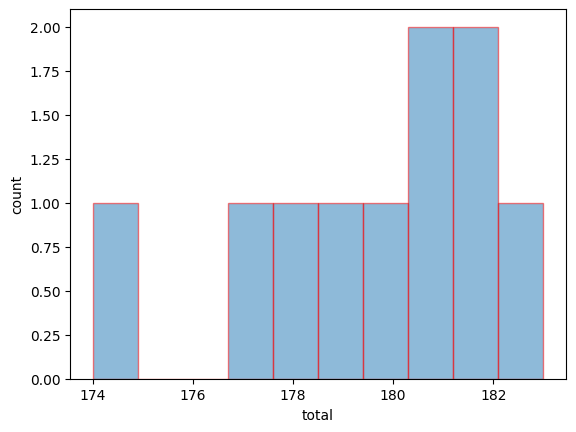

In [11]:
plt.hist(df_digits.target.value_counts(),bins=10,alpha=0.5, edgecolor='red')
plt.xlabel('total')
plt.ylabel('count')
plt.show()


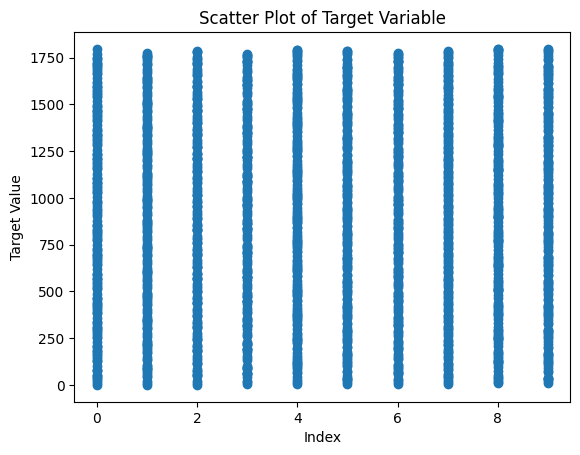

In [12]:
# Assuming df_digits has a column named 'target'
plt.scatter(df_digits.target, df_digits.index)
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of Target Variable')
plt.show()

In [13]:
type(df_digits)

pandas.core.frame.DataFrame

# train test split

In [14]:
X = digit.data
y = digit.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# Logistic Regression Model

## Hyptertuning Parameter

In [16]:
# Define logistic regression model
lr_m = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 250, 500, 1000]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(lr_m, param_distributions=param_grid, n_iter=50, cv=5, random_state=42,n_jobs=-1)

# random_search=RandomizedSearchCV(lr_m,param_distributions=param_grid,n_iter=50,cv=50,random_state=1,n_jobs=-1)
# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the model on the test set
accuracy = best_estimator.score(X_test, y_test)
print("Test Accuracy:", accuracy)


/home/sujon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sujon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sujon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sujon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sujon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be re

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 0.03359818286283781}
Test Accuracy: 0.9722222222222222


In [21]:
lrm=LogisticRegression(solver='lbfgs',
                        penalty='l2',
                        max_iter=100,
                        C= 0.03359818286283781)

In [22]:
lrm.fit(X_train,y_train)

LogisticRegression(C=0.03359818286283781)

In [23]:
y_pred_test=lrm.predict(X_test)
y_pred_train=lrm.predict(X_train)

In [24]:
acc_test=accuracy_score(y_pred_test,y_test)
acc_train=accuracy_score(y_pred_train,y_train)
print(f'Accuracy for test: {round(acc_test*100, 2)}%')
print(f'Accuracy for train: {round(acc_train*100,2)}%')

Accuracy for test: 97.5%
Accuracy for train: 99.79%


In [28]:
## classification report
clf_report=classification_report(y_pred_test,y_test)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for line in clf_report.split("\n")[2:-5]:  # Exclude the first two and last five lines
    row_data = line.split()
    if row_data:
        class_name, precision, recall, f1_score, support = row_data
        table.add_row([class_name, precision, recall, f1_score, support])

# Print the PrettyTable
print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    1.00   |  1.00  |   1.00   |    33   |
|   1   |    1.00   |  0.97  |   0.98   |    29   |
|   2   |    1.00   |  0.97  |   0.99   |    34   |
|   3   |    0.97   |  1.00  |   0.99   |    33   |
|   4   |    0.98   |  1.00  |   0.99   |    45   |
|   5   |    0.94   |  0.94  |   0.94   |    47   |
|   6   |    0.97   |  0.97  |   0.97   |    35   |
|   7   |    0.97   |  1.00  |   0.99   |    33   |
|   8   |    0.97   |  0.97  |   0.97   |    30   |
|   9   |    0.97   |  0.95  |   0.96   |    41   |
+-------+-----------+--------+----------+---------+


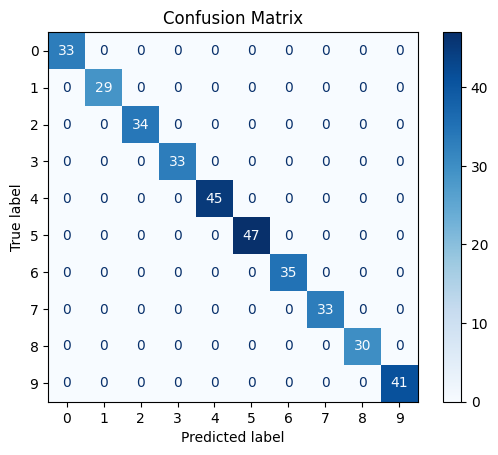

In [42]:
# confusion matrics
classes = ['Class 0', 'Class 1',]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')  # You can adjust the colormap as needed
plt.title('Confusion Matrix')
plt.show()